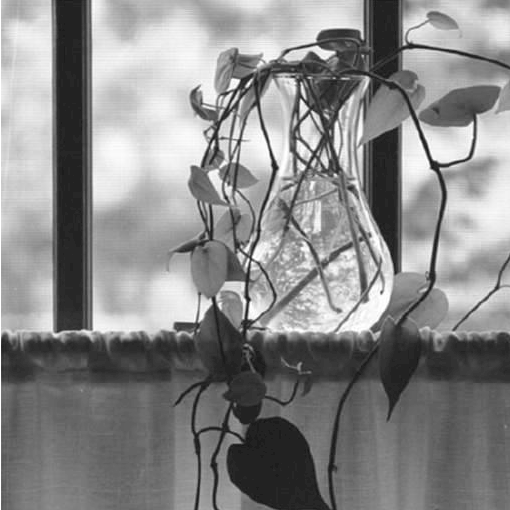

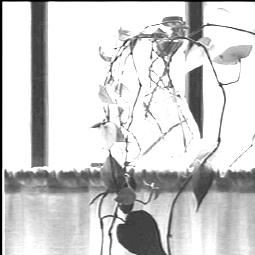

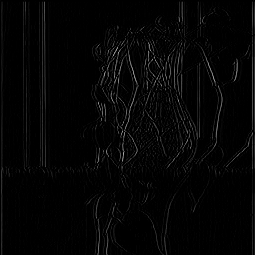

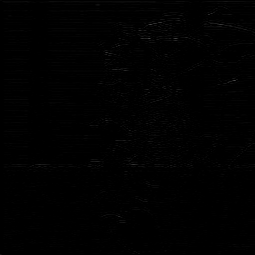

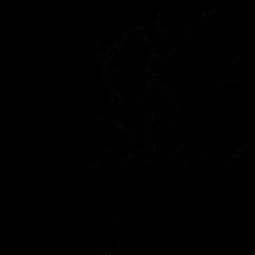

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Define the filters
g0 = [0.23037781, 0.71484657, 0.63088076, -0.02798376, -0.18703481, 0.03084138, 0.03288301, -0.01059740]
g1 = [(-1)**n * g0[len(g0) - 1 - n] for n in range(len(g0))]  # g1[n] formula

h0 = g0[::-1]  # Reverse of g0
h1 = g1[::-1]  # Reverse of g1

# Function to perform vertical filtering and downsampling
def vertical_filter_downsample(image):
    rows, cols = image.shape
    filtered_image0 = np.zeros((rows, cols))
    filtered_image1 = np.zeros((rows, cols))

    for col in range(cols):
        filtered_image0[:, col] = np.convolve(image[:, col], h0, mode='same')
        filtered_image1[:, col] = np.convolve(image[:, col], h1, mode='same')

    # Downsample
    downsampled_image0 = filtered_image0[:, ::2]
    downsampled_image1 = filtered_image1[:, ::2]

    return downsampled_image0, downsampled_image1

# Function to perform horizontal filtering and downsampling
def horizontal_filter_downsample(image):
    rows, cols = image.shape
    filtered_image00 = np.zeros((rows, cols))
    filtered_image01 = np.zeros((rows, cols))
    filtered_image10 = np.zeros((rows, cols))
    filtered_image11 = np.zeros((rows, cols))

    for row in range(rows):
        filtered_image00[row, :] = np.convolve(image[row, :], h0, mode='same')
        filtered_image01[row, :] = np.convolve(image[row, :], h1, mode='same')
        filtered_image10[row, :] = np.convolve(image[row, :], h0, mode='same')
        filtered_image11[row, :] = np.convolve(image[row, :], h1, mode='same')

    # Downsample
    downsampled_image00 = filtered_image00[::2, :]
    downsampled_image01 = filtered_image01[::2, :]
    downsampled_image10 = filtered_image10[::2, :]
    downsampled_image11 = filtered_image11[::2, :]

    return downsampled_image00, downsampled_image01, downsampled_image10, downsampled_image11

# Load the image
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Display the original image
cv2_imshow(image)

# Vertical filtering and downsampling
downsampled_image0_v, downsampled_image1_v = vertical_filter_downsample(image)

# Horizontal filtering and downsampling for downsampled_image0_v
(downsampled_image00_h, downsampled_image01_h, _, _) = horizontal_filter_downsample(downsampled_image0_v)

# Horizontal filtering and downsampling for downsampled_image1_v
(_, _, downsampled_image10_h, downsampled_image11_h) = horizontal_filter_downsample(downsampled_image1_v)

# Display the downsampled images
cv2_imshow(downsampled_image00_h)
cv2_imshow(downsampled_image01_h)
cv2_imshow(downsampled_image10_h)
cv2_imshow(downsampled_image11_h)